<a href="https://colab.research.google.com/github/renya1993/Learning/blob/main/Lasso%E3%83%86%E3%82%B9%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1090.84

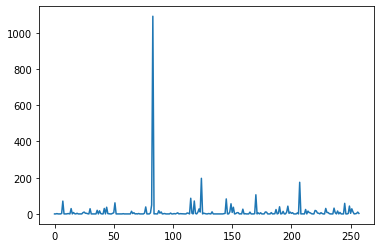

In [69]:
train = pd.read_csv("/content/drive/MyDrive/competition/山火事/train.tsv",sep='\t',index_col="id")
test = pd.read_csv("/content/drive/MyDrive/competition/山火事/test.tsv",sep='\t',index_col="id")
train["area"].max()
plt.plot(np.arange(0,train.shape[0],1),train["area"])
train["area"].max()


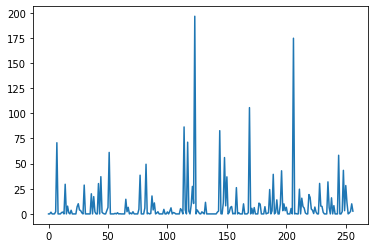

In [70]:
train=train[train["area"]!=1090.84]
plt.plot(np.arange(0,train.shape[0],1),train["area"])


In [71]:
for i in train.columns.tolist():
  print(train[i].isnull().sum())

for i in test.columns.tolist():
  print(test[i].isnull().sum())
#欠損値どちらもなし

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [72]:
#labelencoderを使うと、ラベルをそれぞれ何か数字に変換してくれる
"""
train側
"""

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le = le.fit(train["month"])

train["month"]=le.transform(train["month"])

le2= le.fit(train["day"])
train["day"]=le2.transform(train["day"])
train.info()

"""
test側
"""

le=LabelEncoder()
le = le.fit(test["month"])

test["month"]=le.transform(test["month"])

le2= le.fit(test["day"])
test["day"]=le2.transform(test["day"])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 515
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       257 non-null    int64  
 1   Y       257 non-null    int64  
 2   month   257 non-null    int64  
 3   day     257 non-null    int64  
 4   FFMC    257 non-null    float64
 5   DMC     257 non-null    float64
 6   DC      257 non-null    float64
 7   ISI     257 non-null    float64
 8   temp    257 non-null    float64
 9   RH      257 non-null    int64  
 10  wind    257 non-null    float64
 11  rain    257 non-null    float64
 12  area    257 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 28.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 1 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       259 non-null    int64  
 1   Y       259 non-null    int64  
 2   month   259 non-null    int64  

In [73]:
train_X = train.drop(columns="area")
train_Y = train["area"]

In [74]:
def normalization(x,y):
  return (x - y['mean']) / y['std']

#学習データに対して
train_stats = train_X.describe()
train_stats_T = train_stats.transpose()
normed_train_X = normalization(train_X,train_stats_T)

#テストデータに対して
test_stats = test.describe()
test_stats_T = test_stats.transpose()
normed_test = normalization(test,test_stats_T)

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normed_train_X, train_Y, test_size = 0.01,random_state=0)

In [79]:
from sklearn.linear_model import Lasso

clf = Lasso(alpha=1)
clf.fit(x_train, y_train)
print(clf.coef_)
print(clf.intercept_)



[ 0.20872122 -0.         -0.         -0.          0.          1.14873334
 -0.         -0.          0.         -0.28578907  0.06378073 -0.        ]
8.136512391658556


In [80]:
from sklearn.linear_model import LassoCV
clf = LassoCV(alphas=10 ** np.arange(-6, 1, 0.1), cv=5)
clf.fit(x_train, y_train)
print(clf.alpha_)
print(clf.coef_)

7.943282347242366
[ 0. -0. -0. -0.  0.  0.  0. -0.  0. -0.  0. -0.]


In [81]:
x_train.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'],
      dtype='object')

X,DMC,RH,temp

In [133]:
normed_train_X_Lasso = normed_train_X[["X","DMC","RH","temp"]]
x_train, x_test, y_train, y_test = train_test_split(normed_train_X_Lasso, train_Y, test_size = 0.02,random_state=0)

In [134]:
import torch
import torch.nn as nn
import torch.optim as optimizers

In [135]:
class MLP(nn.Module):
  def __init__(self,input_dim,output_dim):
    super().__init__()
    self.l1 =nn.Linear(input_dim,1)
    self.a1 =nn.ReLU()
    """
    self.l2 =nn.Linear(16,4)
    self.a2 =nn.ReLU()
    self.l3 =nn.Linear(4,1)
    self.a3 =nn.ReLU()
    """
    """
    self.l2 =nn.Linear(128,64)
    self.a2 =nn.ReLU()
    self.l3 =nn.Linear(64,32)
    self.a3 =nn.ReLU()
    self.l4 =nn.Linear(32,16)
    self.a4 =nn.ReLU()
    self.l5 =nn.Linear(16,1)
    self.a5 =nn.ReLU()
    """
    self.layers = [self.l1,self.a1]
    """
    self.layers = [self.l1,self.a1,
                   self.l2,self.a2,
                   self.l3,self.a3,
                   self.l4,self.a4,
                   self.l5,self.a5]
    """
  def forward(self,x):
    for layer in self.layers:
      x = layer(x)
    return x

In [136]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(x_train.shape[1],1).to(device)

criterion = nn.MSELoss()

def compute_loss(t,y):
  return criterion(y,t)

optimizer = optimizers.SGD(model.parameters(),lr=1)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

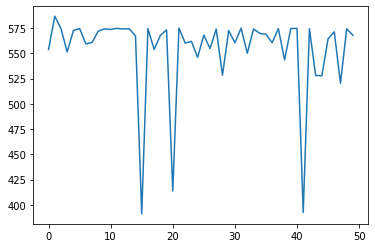

In [137]:


import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def train_step(x,t):
  model.train()
  preds =model(x)
  loss = compute_loss(t,preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  return loss

epochs = 50
train_loss_list=[]
test_loss_list=[]

"""
データの整形
"""
x_train_row = x_train.values.reshape(-1,x_train.shape[1])
x_test_row  = x_test.values.reshape(-1,x_test.shape[1])
y_train_row = y_train.values.reshape(-1,1)
y_test_row  = y_test.values.reshape(-1,1)

batch_size = 30
n_batches = x_train.shape[0] // batch_size


for epoch in range(epochs):
  train_loss = 0
  x_train_row,y_train_row = shuffle(x_train_row,y_train_row)
  #x_test_row,y_test_row = shuffle(x_test_row,y_test_row)
  x_ = torch.Tensor(x_train_row).to(device)
  t_ = torch.Tensor(y_train_row).to(device)

  for n_batch in range(n_batches):
    start = n_batch *batch_size
    end = start+batch_size
    loss_train = train_step(x_[start:end],t_[start:end]).data.cpu().numpy()
    train_loss+=loss_train/n_batches
  #x_t = torch.Tensor(x_test_row).to(device)
  #t_t = torch.Tensor(y_test_row).to(device)
  #loss_train = train_step(x_,t_).data.cpu().numpy()
  #loss_test = compute_loss(x_t,t_t).data.cpu().numpy()

  train_loss_list.append(train_loss)
  #test_loss_list.append(loss_test)

  now_epoch = epoch

#print(train_loss_list)
plt.plot(np.arange(0,now_epoch+1,1),train_loss_list)
#plt.plot(np.arange(0,now_epoch+1,1),test_loss_list)
#print(now_epoch)
print(model(x_))

In [42]:
x_train_row.shape

(255, 4)

In [43]:
y_train_row.shape

(258, 1)